In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import numpy as np

**The Sequrntial Model**

In [2]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(10, activation="softmax")
])


model = keras.Sequential()
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(10, activation="softmax"))

2022-08-08 22:51:07.815530: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-08 22:51:07.819907: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-08 22:51:07.820135: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-08 22:51:07.820510: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [3]:
# layers are built only when they are called for the first time
# because, shape of layer's weight deps on input dimension which is not know during model creation

# model.weights

In [4]:
model.build(input_shape=(None,3))
model.weights

[<tf.Variable 'dense_2/kernel:0' shape=(3, 64) dtype=float32, numpy=
 array([[-0.01728177,  0.18202105,  0.13344258, -0.06259781,  0.0762296 ,
         -0.18444303,  0.11669421,  0.24633586,  0.2709825 , -0.2503717 ,
         -0.02201816, -0.17047454,  0.06104934, -0.03936216,  0.25353473,
         -0.07832678,  0.28366154, -0.23965922, -0.26351303,  0.20566106,
         -0.07706985, -0.01520407, -0.21959433,  0.25699502, -0.00264814,
          0.16713771,  0.08944726,  0.20166856,  0.00428656, -0.06611858,
         -0.21239217,  0.25794816,  0.02162185, -0.0906793 ,  0.28345   ,
         -0.24014968, -0.06032097,  0.12174377, -0.03453949,  0.06549767,
          0.08190158, -0.23211288,  0.1715526 ,  0.16433403,  0.0593597 ,
          0.02893716,  0.21983176,  0.148424  ,  0.28943014,  0.25018656,
          0.23577774, -0.27212653,  0.16660509, -0.18008825,  0.2888024 ,
         -0.1104705 , -0.2769277 , -0.02426618,  0.1345532 , -0.02354407,
         -0.01406929, -0.0274477 , -0.11243

In [5]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 64)                256       
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


In [6]:
# naming a model

model = keras.Sequential(name="test_model")
model.add(layers.Dense(64, activation="relu", name="test_layer_1"))
model.add(layers.Dense(10, activation="softmax", name="test_layer_2"))

model.build(input_shape=(None,3))
model.summary()

# params calc
# 
# test_layer_1: 
# weights = 3 x 64 = 192
# bias = 1 x 64 = 64
# total = 256
# 
# test_layer_2:
# weights = 64 x 10 = 60
# bias = 1 x 10 = 10
# total = 650

Model: "test_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 test_layer_1 (Dense)        (None, 64)                256       
                                                                 
 test_layer_2 (Dense)        (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


In [7]:
# we cant viwe the summary of the model until its built
# model can be built on the go by using keras Input class

model1 = keras.Sequential()
model1.add(keras.Input(shape=(3,)))
model1.add(layers.Dense(64, activation="relu"))
model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                256       
                                                                 
Total params: 256
Trainable params: 256
Non-trainable params: 0
_________________________________________________________________


In [8]:
model1.add(layers.Dense(10, activation="softmax"))
model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                256       
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


**The Functional API**

In [9]:
inputs = keras.Input(shape=(3,), name="input_layer")
feature_1 = layers.Dense(64, activation="relu", name="feature_layer_1")(inputs)
feature_2 = layers.Dense(64, activation="relu", name="feature_layer_2")(feature_1)
outputs = layers.Dense(10, activation="softmax", name="output_layer")(feature_2)

model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 3)]               0         
                                                                 
 feature_layer_1 (Dense)     (None, 64)                256       
                                                                 
 feature_layer_2 (Dense)     (None, 64)                4160      
                                                                 
 output_layer (Dense)        (None, 10)                650       
                                                                 
Total params: 5,066
Trainable params: 5,066
Non-trainable params: 0
_________________________________________________________________


In [10]:
# the "input_layer" object is call "Symbolic Tensor" as it doen't contain actual data but encodes the specs of the actual tensor 

inputs.shape, inputs.dtype

(TensorShape([None, 3]), tf.float32)

**The Functional API**

*Multi-Inputs Multi-oututs model*

In [11]:
from ast import mod
from unicodedata import name


voc_size = 1000
num_tags = 100
num_dept = 4

title = keras.Input(shape=(voc_size,), name="title")
text_body = keras.Input(shape=(voc_size,), name="text_body")
tags = keras.Input(shape=(num_tags,), name="tags")

feature_layer_1 = layers.Concatenate()([title, text_body, tags])
feature_layer_2 = layers.Dense(64, activation="relu", name="feature_layer_2")(feature_layer_1)

priority = layers.Dense(1, activation="sigmoid", name="priority")(feature_layer_2)
dept = layers.Dense(num_dept, activation="softmax", name="department")(feature_layer_2)

mimo_model = keras.Model(inputs=[title, text_body, tags], outputs=[priority, dept])
mimo_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 title (InputLayer)             [(None, 1000)]       0           []                               
                                                                                                  
 text_body (InputLayer)         [(None, 1000)]       0           []                               
                                                                                                  
 tags (InputLayer)              [(None, 100)]        0           []                               
                                                                                                  
 concatenate (Concatenate)      (None, 2100)         0           ['title[0][0]',                  
                                                                  'text_body[0][0]',        

In [12]:
num_samples = 1280

# dummy inputs
title_data = np.random.randint(0, 2, size=(num_samples, voc_size))
text_body_data = np.random.randint(0, 2, size=(num_samples, voc_size))
tags_data = np.random.randint(0, 2, size=(num_samples, num_tags))

# dummy targets
priority_data = np.random.random(size=(num_samples,1))
dept_data = np.random.randint(0, 2, size=(num_samples, num_dept))

In [13]:
mimo_model.compile(optimizer="rmsprop",
                    loss=["mean_squared_error", "categorical_crossentropy"],
                    metrics=[["mean_absolute_error"], ["accuracy"]])

mimo_model.fit([title_data, text_body_data, tags_data],
                    [priority_data, dept_data],
                    epochs=1)

40/40 [==============================] - 1s 2ms/step - loss: 4.4124 - priority_loss: 0.1431 - department_loss: 4.2693 - priority_mean_absolute_error: 0.3107 - department_accuracy: 0.2211


In [14]:
mimo_model.evaluate([title_data, text_body_data, tags_data],
                [priority_data, dept_data])

priority_preds, dept_preds = mimo_model.predict([title_data, text_body_data, tags_data])

40/40 [==============================] - 0s 1ms/step


In [15]:
# providing inputs & targets as dicts using layer names

mimo_model.compile(optimizer="rmsprop",
                    loss={"priority": "mean_squared_error", "department": "categorical_crossentropy"},
                    metrics={"priority": ["mean_absolute_error"], "department": ["accuracy"]})

mimo_model.fit({"title": title_data, "text_body": text_body_data, "tags": tags_data},
                    {"priority": priority_data, "department": dept_data},
                    epochs=1)

mimo_model.evaluate({"title": title_data, "text_body": text_body_data, "tags": tags_data},
                    {"priority": priority_data, "department": dept_data})

priority_preds, dept_preds = mimo_model.predict({"title": title_data, "text_body": text_body_data, "tags": tags_data})

40/40 [==============================] - 0s 1ms/step


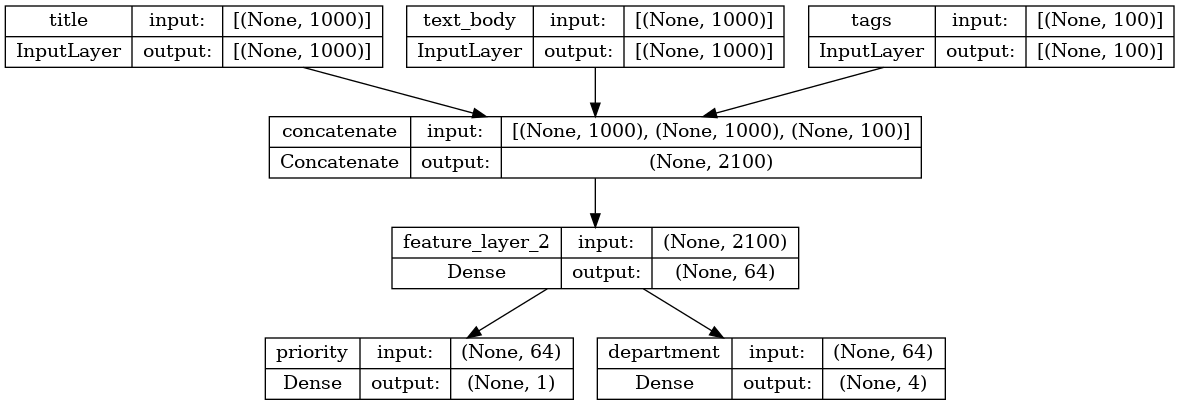

In [16]:
keras.utils.plot_model(mimo_model, show_shapes=True)

In [17]:
mimo_model.layers

In [18]:
mimo_model.layers[0].input, mimo_model.layers[0].output

# this enables to do feature extraction

(<KerasTensor: shape=(None, 1000) dtype=float32 (created by layer 'title')>,
 <KerasTensor: shape=(None, 1000) dtype=float32 (created by layer 'title')>)

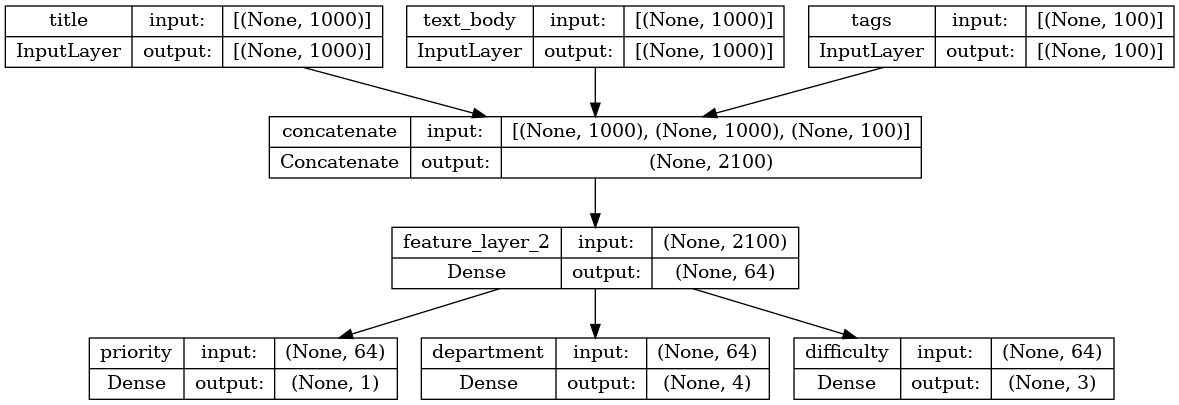

In [19]:
features = mimo_model.layers[4].output
difficulty = layers.Dense(3, activation="softmax", name="difficulty")(features)

new_model = keras.Model(inputs=[title, text_body, tags],
                        outputs=[priority, dept, difficulty])

keras.utils.plot_model(new_model, show_shapes=True)

**Subclassing Model Class**

In [20]:
class CustomerTicketModel(keras.Model):

    def __init__(self, num_depts):
        super().__init__()
        self.concat_layer = layers.Concatenate()
        self.mixing_layer = layers.Dense(64, activation="relu")
        self.priority_scorer = layers.Dense(1, activation="sigmoid", name="priority")
        self.dept_classifier= layers.Dense(num_dept, activation="softmax", name="department")

    def call(self, inputs):
        title = inputs["title"]
        text_body = inputs["text_body"]
        tags = inputs["tags"]

        features = self.concat_layer([title, text_body, tags])
        features = self.mixing_layer(features)

        priority = self.priority_scorer(features)
        dept = self.dept_classifier(features)

        return priority, dept

In [21]:
ct_model = CustomerTicketModel(num_depts=4)

priority, dept = ct_model({"title": title_data, "text_body": text_body_data, "tags": tags_data})

ct_model.summary()

Model: "customer_ticket_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 concatenate_1 (Concatenate)  multiple                 0         
                                                                 
 dense_6 (Dense)             multiple                  134464    
                                                                 
 priority (Dense)            multiple                  65        
                                                                 
 department (Dense)          multiple                  260       
                                                                 
Total params: 134,789
Trainable params: 134,789
Non-trainable params: 0
_________________________________________________________________


In [22]:
ct_model.compile(optimizer="rmsprop",
                    loss=["mean_squared_error", "categorical_crossentropy"],
                    metrics=[["mean_absolute_error"], ["accuracy"]])

ct_model.fit({"title": title_data, "text_body": text_body_data, "tags": tags_data},
                    [priority_data, dept_data],
                    epochs=1)

ct_model.evaluate({"title": title_data, "text_body": text_body_data, "tags": tags_data},
                    [priority_data, dept_data],)

priority_preds, dept_preds = ct_model.predict({"title": title_data, "text_body": text_body_data, "tags": tags_data})

40/40 [==============================] - 0s 1ms/step


**Mixing & Matching Different Components**

*Creating a functional model that includes a sub-classed model*

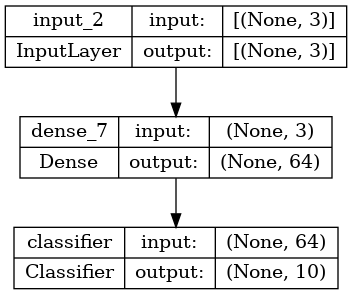

In [23]:
class Classifier(keras.Model):

    def __init__(self, num_classes=2):
        super().__init__()

        if num_classes == 2:
            num_units = 1
            activation = "sigmoid"
        else:
            num_units = num_classes
            activation = "softmax"

        self.dense = layers.Dense(num_units, activation=activation)

    def call (self, inputs):
        return self.dense(inputs)

inputs = keras.Input(shape=(3,))
features = layers.Dense(64, activation="relu")(inputs)
outputs = Classifier(num_classes=10)(features)
model2 = keras.Model(inputs=inputs, outputs=outputs)

keras.utils.plot_model(model2, show_shapes=True)

*Creating a sub-classed model that includes a functional model*

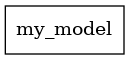

In [24]:
inputs = keras.Input(shape=(64,))
outputs = layers.Dense(1, activation="sigmoid")(inputs)
binary_classifier = keras.Model(inputs=inputs, outputs=outputs)

class MyModel(keras.Model):

    def __init__(self, num_classes=2):
        super().__init__()
        self.dense = layers.Dense(64, activation="relu")
        self.classifier = binary_classifier

    def call(self, inputs):
        features = self.dense(inputs)
        return self.classifier(features)

model3 = MyModel()
inputs = keras.Input(shape=(3,))
output = model3(inputs)

keras.utils.plot_model(model3, show_shapes=True)

In [25]:
from numba import cuda
cuda.select_device(0)
cuda.close()